# The evolution of Trust using pairwise immitation update

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns

%matplotlib inline

In [2]:
import egttools as egt

In [3]:
from egttools.plotting.simplified import plot_replicator_dynamics_in_simplex

## Part 1: Infinite populations

In [4]:
strategies = [egt.behaviors.NormalForm.TwoActions.Cooperator(), 
              egt.behaviors.NormalForm.TwoActions.Defector(), 
              egt.behaviors.NormalForm.TwoActions.Detective()]

In [5]:
strategy_labels = [strategy.type().replace("NFGStrategies::", '') for strategy in strategies]

In [6]:
A = np.array([
    [-1, 1],
    [1, -1]
])

In [7]:
nb_rounds = 5

In [8]:
game = egt.games.NormalFormGame(nb_rounds, A, strategies)

In [9]:
game.expected_payoffs()

array([[-1. ,  1. , -0.2],
       [ 1. , -1. ,  0.2],
       [-0.2,  0.2, -1. ]])

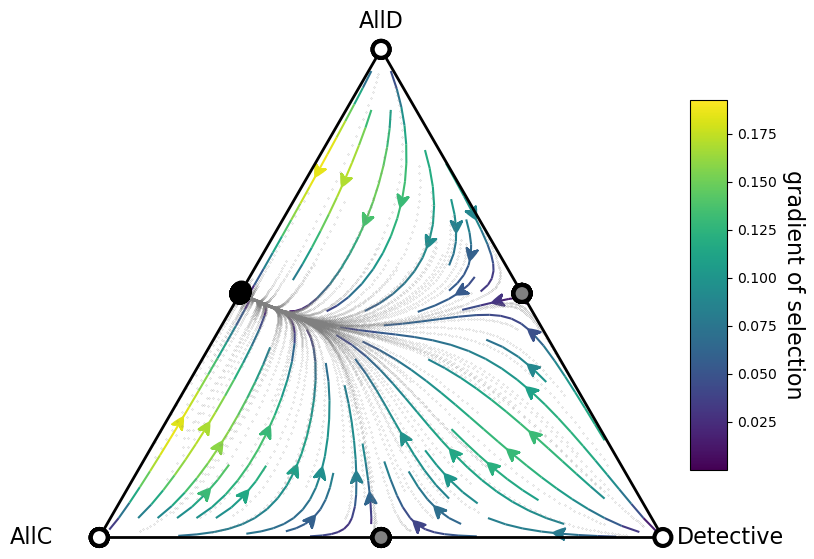

In [10]:
fig, ax = plt.subplots(figsize=(10,8))

simplex, gradients, roots, roots_xy, stability = plot_replicator_dynamics_in_simplex(game.expected_payoffs(), ax=ax)

plot = (simplex.draw_triangle()
           .draw_gradients(density=1)
           .add_colorbar(label='gradient of selection')
           .add_vertex_labels(strategy_labels, epsilon_bottom=0.12)
           .draw_stationary_points(roots_xy, stability)
#            .draw_trajectory_from_roots(lambda u, t: egt.analytical.replicator_equation(u, game.expected_payoffs()), 
#                                        roots,
#                                        stability,
#                                        trajectory_length=30,
#                                        linewidth=0.1,
#                                        step=0.01,
#                                        color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
           .draw_scatter_shadow(lambda u, t: egt.analytical.replicator_equation(u, game.expected_payoffs()), 100, color='gray', marker='.', s=0.1)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

In [11]:
nb_rounds = 100

In [12]:
game = egt.games.NormalFormGame(nb_rounds, A, strategies)

In [13]:
game.expected_payoffs()

array([[-1.  ,  1.  , -0.98],
       [ 1.  , -1.  , -0.94],
       [-0.98, -0.94, -1.  ]])

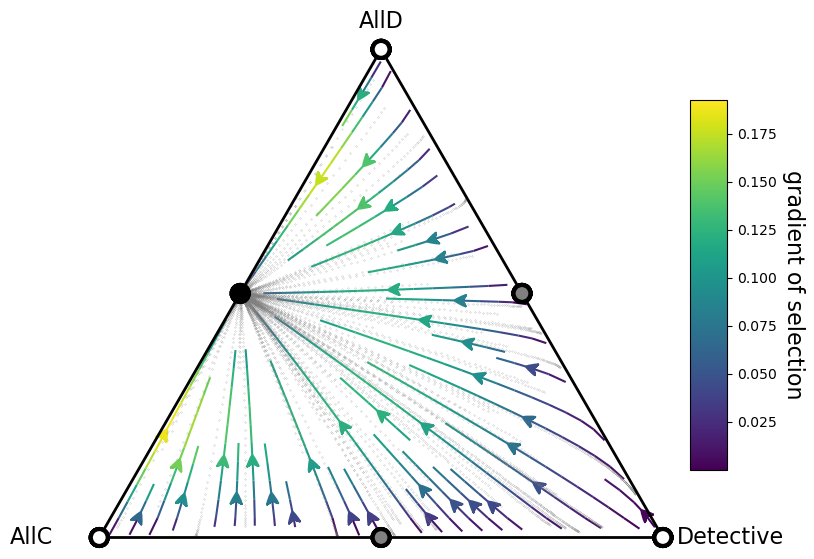

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

simplex, gradients, roots, roots_xy, stability = plot_replicator_dynamics_in_simplex(game.expected_payoffs(), ax=ax)

plot = (simplex.draw_triangle()
           .draw_gradients(density=1)
           .add_colorbar(label='gradient of selection')
           .add_vertex_labels(strategy_labels, epsilon_bottom=0.12)
           .draw_stationary_points(roots_xy, stability)
#            .draw_trajectory_from_roots(lambda u, t: egt.analytical.replicator_equation(u, game.expected_payoffs()), 
#                                        roots,
#                                        stability,
#                                        trajectory_length=50,
#                                         linewidth=0.1,
#                                        step=0.01,
#                                        color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
           .draw_scatter_shadow(lambda u, t: egt.analytical.replicator_equation(u, game.expected_payoffs()), 100, color='gray', marker='.', s=0.1)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

## Part 2: small mutation limit

In [15]:
strategies = [egt.behaviors.NormalForm.TwoActions.Cooperator(), 
              egt.behaviors.NormalForm.TwoActions.Defector(), 
              egt.behaviors.NormalForm.TwoActions.TFT(), 
              egt.behaviors.NormalForm.TwoActions.GRIM(), 
              egt.behaviors.NormalForm.TwoActions.Detective()]

In [16]:
strategy_labels = [strategy.type().replace("NFGStrategies::", '') for strategy in strategies]

In [17]:
nb_rounds = 100

In [18]:
game = egt.games.NormalFormGame(nb_rounds, A, strategies)

In [19]:
game.expected_payoffs()

array([[-1.  ,  1.  , -1.  , -1.  ,  0.94],
       [ 1.  , -1.  , -0.98, -0.98, -0.94],
       [-1.  , -0.98, -1.  , -1.  , -0.96],
       [-1.  , -0.98, -1.  , -1.  , -0.94],
       [ 0.94, -0.94, -0.96, -0.94, -1.  ]])

### Part 2.1: Effect of $\beta$

In [20]:
Z = 100
beta = 0.1

evolver = egt.analytical.StochDynamics(len(strategies), game.expected_payoffs(), Z)

In [21]:
transition_matrix,fixation_probabilities = evolver.transition_and_fixation_matrix(beta)
stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix)

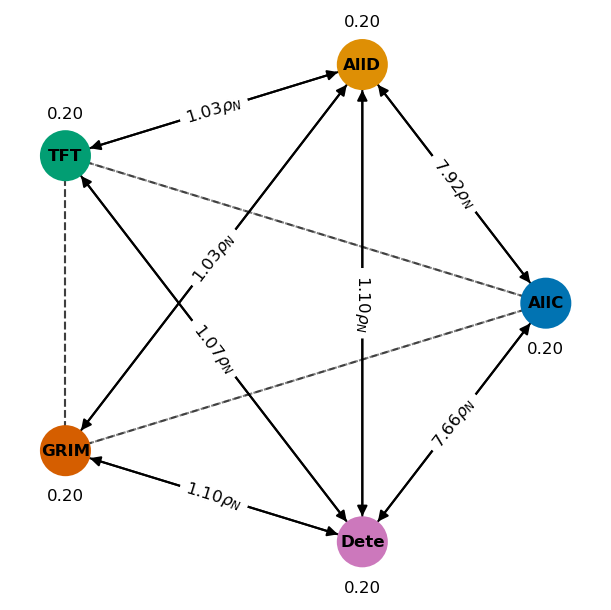

In [22]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = egt.plotting.draw_stationary_distribution(strategy_labels,
                                              1/Z, fixation_probabilities, stationary_distribution,
                                              node_size=600, 
                                              font_size_node_labels=8,
                                              font_size_edge_labels=8,
                                              font_size_sd_labels=8,
                                              edge_width=1,
                                              min_strategy_frequency=-0.01, 
                                              ax=ax)
plt.axis('off')
plt.show() # display

In [23]:
Z = 100
beta = 10

evolver = egt.analytical.StochDynamics(len(strategies), game.expected_payoffs(), Z)

In [24]:
transition_matrix,fixation_probabilities = evolver.transition_and_fixation_matrix(beta)
stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix)

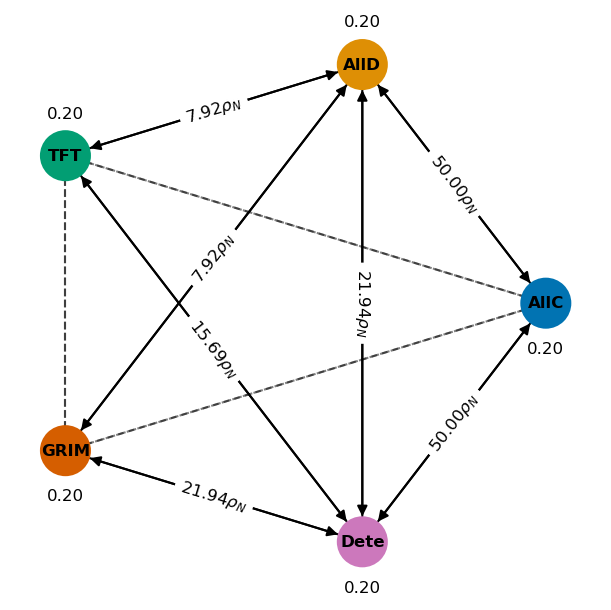

In [25]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = egt.plotting.draw_stationary_distribution(strategy_labels,
                                              1/Z, fixation_probabilities, stationary_distribution,
                                              node_size=600, 
                                              font_size_node_labels=8,
                                              font_size_edge_labels=8,
                                              font_size_sd_labels=8,
                                              edge_width=1,
                                              min_strategy_frequency=-0.01, 
                                              ax=ax)
plt.axis('off')
plt.show() # display

### Part 2.2 Effect of $Z$

In [26]:
Z = 30
beta = 10

evolver = egt.analytical.StochDynamics(len(strategies), game.expected_payoffs(), Z)

In [27]:
transition_matrix,fixation_probabilities = evolver.transition_and_fixation_matrix(beta)
stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix)

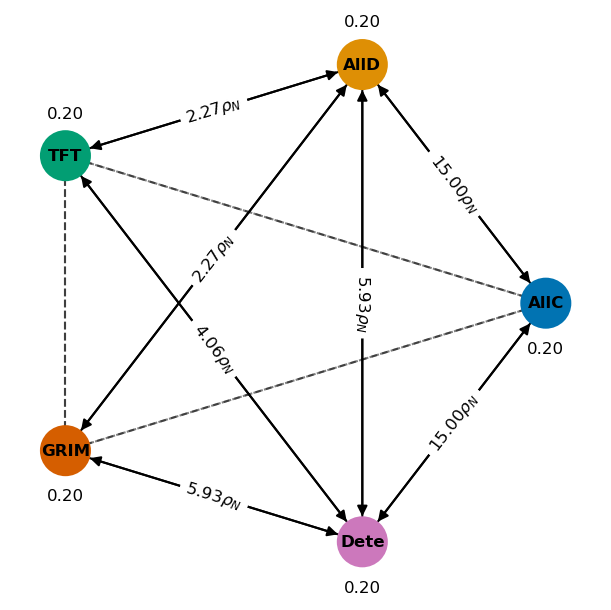

In [28]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = egt.plotting.draw_stationary_distribution(strategy_labels,
                                              1/Z, fixation_probabilities, stationary_distribution,
                                              node_size=600, 
                                              font_size_node_labels=8,
                                              font_size_edge_labels=8,
                                              font_size_sd_labels=8,
                                              edge_width=1,
                                              min_strategy_frequency=-0.01, 
                                              ax=ax)
plt.axis('off')
plt.show() # display

In [29]:
Z = 50
beta = 10

evolver = egt.analytical.StochDynamics(len(strategies), game.expected_payoffs(), Z)

In [30]:
transition_matrix,fixation_probabilities = evolver.transition_and_fixation_matrix(beta)
stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix)

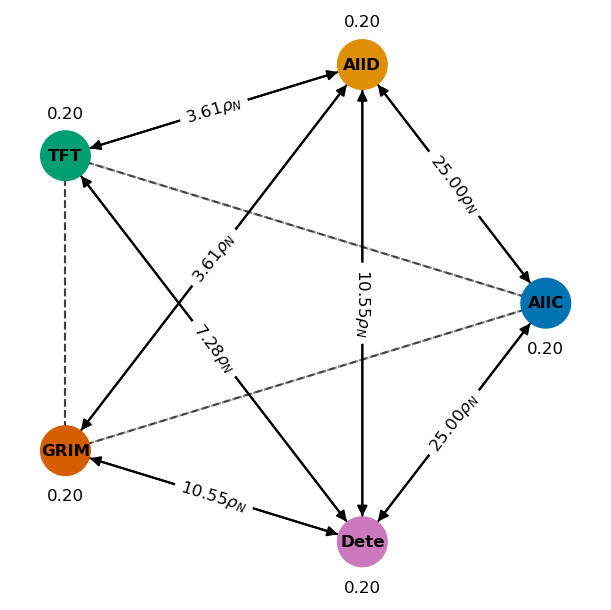

In [31]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = egt.plotting.draw_stationary_distribution(strategy_labels,
                                              1/Z, fixation_probabilities, stationary_distribution,
                                              node_size=600, 
                                              font_size_node_labels=8,
                                              font_size_edge_labels=8,
                                              font_size_sd_labels=8,
                                              edge_width=1,
                                              min_strategy_frequency=-0.01, 
                                              ax=ax)
plt.axis('off')
plt.show() # display

### Part 2.3: Which strategy(s) are dominant

TFT (or copycat) is the only dominant strategy, since it is the only one which is never invaded by any other strategy

## Part 3: Monte Carlo simulations

In [32]:
strategies = [egt.behaviors.NormalForm.TwoActions.Cooperator(), 
              egt.behaviors.NormalForm.TwoActions.Defector()]

In [33]:
game = egt.games.NormalFormGame(nb_rounds, A, strategies)

In [34]:
Z = 50
beta = 1
mu = 1e-3
transitory = 1000
nb_generations = 1000000
nb_runs = 10

In [35]:
evolver = egt.numerical.PairwiseMoran(Z, game, 100000)

In [36]:
sd = evolver.estimate_stationary_distribution_sparse(nb_runs, nb_generations, transitory, beta, mu)

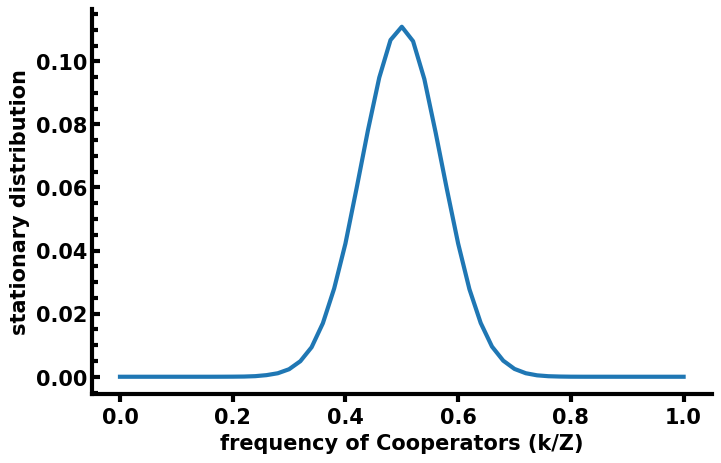

In [37]:
sns.set_context("notebook", rc={"lines.linewidth": 3, "axes.linewidth": 3})

fix, ax = plt.subplots(figsize=(8, 5))

ax.plot(np.arange(0, Z+1)/Z, sd.toarray()[0])
ax.set_ylabel('stationary distribution', fontsize=15, fontweight='bold')
ax.set_xlabel('frequency of Cooperators (k/Z)', fontsize=15, fontweight='bold')
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='x', which='both', labelsize=15, width=3)
ax.tick_params(axis='y', which='both', direction='in', labelsize=15, width=3)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

sns.despine()

In [38]:
from egttools.plotting import Simplex2D

In [39]:
strategies = [egt.behaviors.NormalForm.TwoActions.Cooperator(), 
              egt.behaviors.NormalForm.TwoActions.Defector(), 
              egt.behaviors.NormalForm.TwoActions.Detective()]

In [40]:
strategy_labels = [strategy.type().replace("NFGStrategies::", '') for strategy in strategies]

In [41]:
game = egt.games.NormalFormGame(nb_rounds, A, strategies)

In [42]:
mu=1/Z

In [43]:
analytical_evolver = egt.analytical.StochDynamics(3, game.expected_payoffs(), Z, mu=mu)
sd_analytical = analytical_evolver.calculate_stationary_distribution(beta)

In [44]:
evolver = egt.numerical.PairwiseMoran(Z, game, 100000)
sd_estimated = evolver.estimate_stationary_distribution_sparse(nb_runs, 10000000, transitory, beta, mu).toarray()[0,:]

(-0.02, 0.9160254037844386)

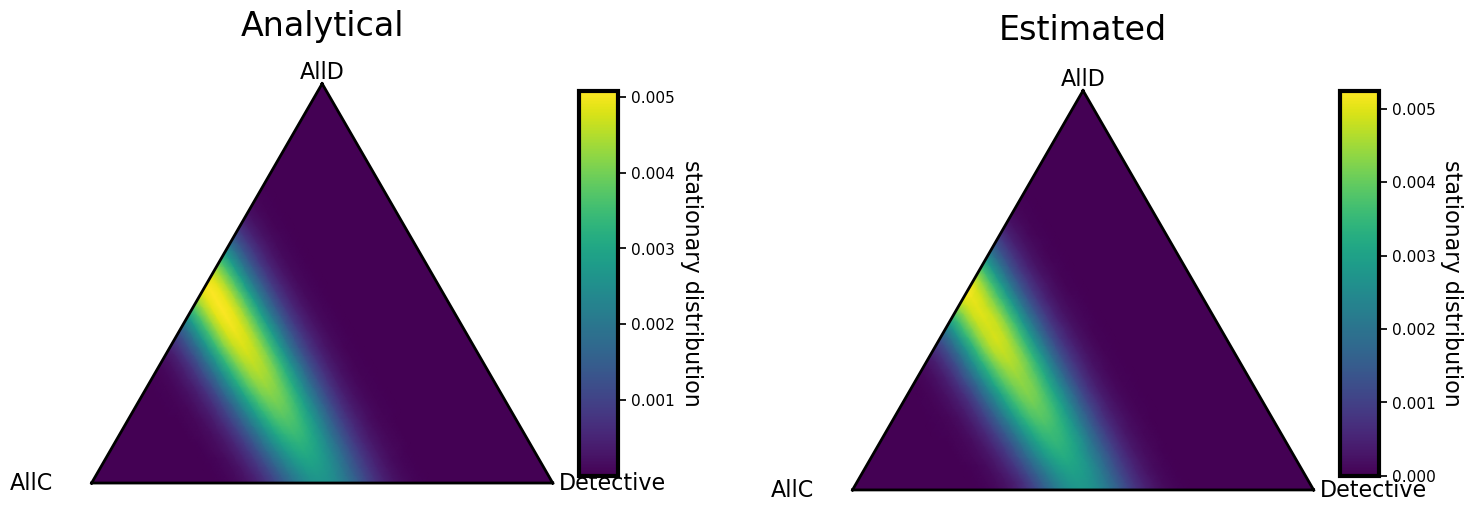

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(18,10))


plot = (Simplex2D(discrete=True, size=Z, nb_points=Z+1).add_axis(ax=axes[0])
           .draw_triangle()
           .add_vertex_labels(strategy_labels, epsilon_bottom=0.13, epsilon_top=0.03)
           .draw_stationary_distribution(sd_analytical, alpha=1, shrink=0.5,
                                         edgecolors='gray', cmap='viridis', shading='gouraud', zorder=0)
          )

axes[0].set_title("Analytical", pad=20, fontsize=24)
axes[0].axis('off')
axes[0].set_aspect('equal')

plot = (Simplex2D(discrete=True, size=Z, nb_points=Z+1).add_axis(ax=axes[1])
           .draw_triangle()
           .add_vertex_labels(strategy_labels, epsilon_bottom=0.13, epsilon_top=0.03)
           .draw_stationary_distribution(sd_estimated, alpha=1, shrink=0.5,
                                         edgecolors='gray', cmap='viridis', shading='gouraud', zorder=0)
          )

axes[1].set_title("Estimated", pad=20, fontsize=24)
axes[1].axis('off')
axes[1].set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))